# Portfolio Part 3 - Analysis of Mobile Price Data (2024 S1)

In this Portfolio task, you will work on a new dataset named 'Mobile Price Data', it contains numerous details about mobile phone hardware, specifications, and prices. Your main task is to train classification models to predict **mobile phone prices** ('price range' in the dataset)and evaluate the strengths and weaknesses of these models.

Here's the explanation of each column:

|Column|Meaning|
|:-----:|:-----:|
|battery power|Total energy a battery can store in one time measured in mAh|
|blue|Has bluetooth or not|
|clock speed|speed at which microprocessor executes instructions|
|dual sim|Has dual sim support or not|
|fc|Front Camera mega pixels|
|four g|Has 4G or not|
|int memory|Internal Memory in Gigabytes|
|m dep|Mobile Depth in cm|
|mobile wt|Weight of mobile phone|
|n cores|Number of cores of processor|
|pc|Primary Camera mega pixels|
|px height|Pixel Resolution Height|
|px width|Pixel Resolution Width|
|ram|Random Access Memory in Mega Bytes|
|sc h|Screen Height of mobile in cm|
|sc w|Screen Width of mobile in cm|
|talk time|longest time that a single battery charge will last when you are|
|three g|Has 3G or not|
|touch screen|Has touch screen or not|
|wifi|Has wifi or not|
|price range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)|

Blue, dual sim, four g, three g, touch screen, and wifi are all binary attributes, 0 for not and 1 for yes.

Your high level goal in this notebook is to build and evaluate predictive models for 'price range' from other available features. More specifically, you need to **complete the following major steps**:

1. ***Explore the data*** and ***clean the data if necessary***. For example, remove abnormal instanaces and replace missing values.

2. ***Study the correlation*** between 'price range' with other features. And ***select the variables*** that you think are helpful for predicting the price range. We do not limit the number of variables.

3. ***Split the dataset*** (Trainging set : Test set = 8 : 2)

4. ***Train a logistic regression model*** to predict 'price range' based on the selected features (from the second step). ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.) ***Explain your model and evaluate its performance*** (Is the model performing well? If yes, what factors might be contributing to the good performance of your model? If not, how can improvements be made?).

5. ***Train a KNN model*** to predict 'price range' based on the selected features (you can use the features selected from the second step and set K with an ad-hoc manner in this step. ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.)

6. ***Tune the hyper-parameter K*** in KNN (Hints: GridsearchCV), ***visualize the results***, and ***explain*** how K influences the prediction performance.

  Hints for visualization: You can use line chart to visualize K and mean accuracy scores on test set.

Note 1: In this assignment, we no longer provide specific guidance and templates for each sub task. You should learn how to properly comment your notebook by yourself to make your notebook file readable.

Note 2: You will not being evaluated on the accuracy of the model but on the process that you use to generate it and your explanation.

### Imported the Dataset


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

dataset = pd.read_csv('Mobile_Price_Data.csv')
print('The length of the dataset is : ' + str(len(dataset)))

The length of the dataset is : 2000


### Exploring the dataset

In [21]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756.0,2549.0,9,7,19,0.0,0,1,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988.0,2631.0,17,3,7,1.0,1,0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716.0,2603.0,11,2,9,1.0,1,0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786.0,2769.0,16,8,11,1.0,0,0,2
4,1821,1,1.2,0,13,1,44.0,0.6,141,2,...,1208,1212.0,1411.0,8,2,15,1.0,1,0,1


In [22]:
#dataset.info()
missing_values = dataset.isnull().sum()
print(missing_values)

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       1
m_dep            1
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         1
ram              1
sc_h             0
sc_w             0
talk_time        0
three_g          1
touch_screen     0
wifi             0
price_range      0
dtype: int64


 There is 5 missing values in the dataset
  - As the dataset has a length of 2000 its a preety large amount and there is no need of impute those missing values with median.
  - Those five rows will be simply deleted.
 

In [23]:
#Romeving 5 rows with missing values
clean_Dataset= dataset.dropna()
print(len(clean_Dataset))

1995


In [24]:
#Cheacking that clean_dataset has no missing values
print(clean_Dataset.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [25]:
#print(clean_Dataset.describe)

In [26]:
def detect_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtering the outliers
    outliers = clean_Dataset[(clean_Dataset[feature] < lower_bound) | (clean_Dataset[feature] > upper_bound)]
    return outliers.index

numerical_columns = clean_Dataset.select_dtypes(include=['number']).columns.tolist()


outliers_dict = {}

# Apply the outlier detection to each numerical feature
for feature in numerical_columns:
    outlier_indices = detect_outliers(clean_Dataset, feature)
    if len(outlier_indices) > 0:
        outliers_dict[feature] = outlier_indices

for feature, indices in outliers_dict.items():
    print(f"Feature: {feature}, Number of Outliers: {len(indices)}")

Feature: fc, Number of Outliers: 18
Feature: px_height, Number of Outliers: 2
Feature: three_g, Number of Outliers: 477


### Using the IQR methord we can find that fc , px_height and three_g has abmornal values

In [27]:
features_with_outliers = ['fc', 'px_height', 'three_g']

all_outlier_indices = set()

# Collect all outlier indices
for feature in features_with_outliers:
    outlier_indices = detect_outliers(clean_Dataset, feature)
    all_outlier_indices.update(outlier_indices)

# Remove the outliers from the dataset_

new_clean_data = clean_Dataset.drop(index=all_outlier_indices)

In [28]:
print(len(new_clean_data))

1501


### After cleaning the outliers, the dataset has 1501 entries
 Now the next steps will be done by using the new dataset named "new_clean_data"

In [29]:
# Calculate the correlation matrix
correlation_matrix = new_clean_data.corr()

# Extract correlations with 'price_range'
price_range_correlations = correlation_matrix['price_range'].sort_values()

print(price_range_correlations)


touch_screen    -0.029104
mobile_wt       -0.019009
clock_speed     -0.008848
four_g           0.000978
n_cores          0.002502
dual_sim         0.003173
talk_time        0.004724
sc_h             0.011306
blue             0.013175
wifi             0.015114
m_dep            0.017327
fc               0.023458
sc_w             0.032297
int_memory       0.039095
pc               0.045168
px_height        0.137976
px_width         0.154740
battery_power    0.200931
ram              0.917849
price_range      1.000000
three_g               NaN
Name: price_range, dtype: float64


##### "price_range" has strong correlation with "Ram" and "battery_power"

In [30]:
X = new_clean_data[['ram', 'battery_power']]  
y = new_clean_data['price_range']             

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (1200, 2)
Test set size: (301, 2)


- Firstly, I am selecting features Ram and Battery Power then store it to X variable.
- Similarly, Y variable is holding targeted variable "Price range"
- Then, splited the dataset 80% training and 20% testing


In [31]:
# Creating a logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions on the training set and test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training set accuracy:", train_accuracy)
print("Test set accuracy:", test_accuracy)

Training set accuracy: 0.8175
Test set accuracy: 0.840531561461794


#### From the above results the training and testing accuracy is signifantly high as Ram has a very strong correlation.
* Therefore, testing set has a high accuracy means the model is not over fitting.

In [32]:
knn = KNeighborsClassifier(n_neighbors=9)

# Train the model
knn.fit(X_train, y_train)

# Predictions on the training set and test set
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate accuracy on the training set and test set
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training set accuracy:", train_accuracy)
print("Test set accuracy:", test_accuracy)

Training set accuracy: 0.8375
Test set accuracy: 0.8272425249169435


* The KNeighborsClassifier is set with "n_neighbors=9"
* k is representing how many nearest neighbors in the feature space the algorithm considers when making a prediction.
* K too small may overfit and k too high mayunderfit

Overall, the knn model is perfoming well. price_range having good correlation with Ram and battery_power is a big factor. Therefore,
k=5 for the number of neighbors seems to be effective for this dataset, balancing between overfitting and underfitting.
Adding more features like px_width and px_hight may even increase the accuracy.

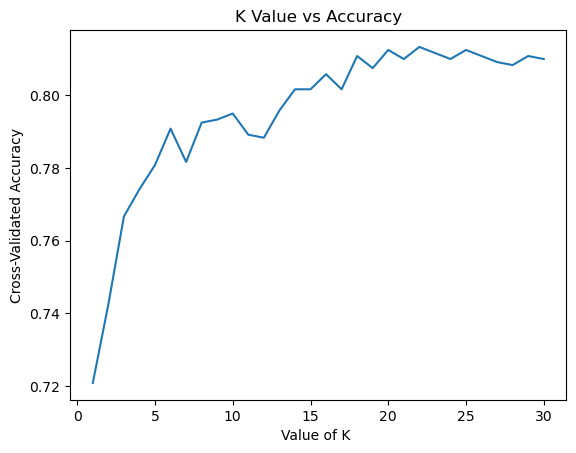

Best K Value: {'n_neighbors': 22}
Best cross-validated accuracy: 0.8133333333333332


In [33]:
k_range = list(range(1, 31))  
param_grid = dict(n_neighbors=k_range)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)

grid.fit(X_train, y_train)

# Viewing the results
results = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

# Plotting mean accuracy scores for each k
plt.plot(k_range, results['mean_test_score'])
plt.xlabel('Value of K ')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K Value vs Accuracy')
plt.show()

print("Best K Value:", grid.best_params_)
print("Best cross-validated accuracy:", grid.best_score_)

* Firstly, I defined a range of potential K values (1 to 31)
* Secondly,Run "GridSearchCV" on the training data.
* Thirdly, get the 'mean_test_score' for every values of k
* Finally, Useing a line chart to visualize K versus mean accuracy scores.

### Analyzing how K influences the prediction performance.

- when k is too small it is only considering the nearest neighbours. Which may causing overfitting.Therefore,
the model is following the training dataset and not performing well in unseen dataset.
- When k is increasing, the model starts considering more neighbours. Eventually the model is Performing well.
- However, when k is too high, the model is considering too many points.It may cause overfitting.

##### The knn model performs best to predict "Price Range" when K is 22 (81.3% accuracy)